# EX4_2 standard deviation and average

In [1]:
import re
import numpy as np

# Extract computation times from the text
text = """
Starting run 1...
DFTW calculation with N = 10000 
DFTW computation in 0.604814 seconds
Xre[0] = 10000.000000 
Starting run 2...
DFTW calculation with N = 10000 
DFTW computation in 0.599337 seconds
Xre[0] = 10000.000000 
Starting run 3...
DFTW calculation with N = 10000 
DFTW computation in 0.601074 seconds
Xre[0] = 10000.000000 
Starting run 4...
DFTW calculation with N = 10000 
DFTW computation in 0.601889 seconds
Xre[0] = 10000.000000 
Starting run 5...
DFTW calculation with N = 10000 
DFTW computation in 0.602966 seconds
Xre[0] = 10000.000000 
Starting run 6...
DFTW calculation with N = 10000 
DFTW computation in 0.601661 seconds
Xre[0] = 10000.000000 
Starting run 7...
DFTW calculation with N = 10000 
DFTW computation in 0.603035 seconds
Xre[0] = 10000.000000 
Starting run 8...
DFTW calculation with N = 10000 
DFTW computation in 0.602885 seconds
Xre[0] = 10000.000000 
Starting run 9...
DFTW calculation with N = 10000 
DFTW computation in 0.602389 seconds
Xre[0] = 10000.000000 
Starting run 10...
DFTW calculation with N = 10000 
DFTW computation in 0.601114 seconds
Xre[0] = 10000.000000 
Starting run 11...
DFTW calculation with N = 10000 
DFTW computation in 0.604021 seconds
Xre[0] = 10000.000000 
Starting run 12...
DFTW calculation with N = 10000 
DFTW computation in 0.598391 seconds
Xre[0] = 10000.000000 
Starting run 13...
DFTW calculation with N = 10000 
DFTW computation in 0.600354 seconds
Xre[0] = 10000.000000 
Starting run 14...
DFTW calculation with N = 10000 
DFTW computation in 0.598700 seconds
Xre[0] = 10000.000000 
Starting run 15...
DFTW calculation with N = 10000 
DFTW computation in 0.607273 seconds
Xre[0] = 10000.000000 
"""

# Use regular expressions to find all computation times
times = re.findall(r'DFTW computation in (\d+.\d+) seconds', text)
times = list(map(float, times))

# Calculate average and standard deviation
average_time = np.mean(times)
std_deviation = np.std(times)

average_time, std_deviation

(np.float64(0.6019935333333333), np.float64(0.0022837300735614133))

## EX4_3 Speedup 

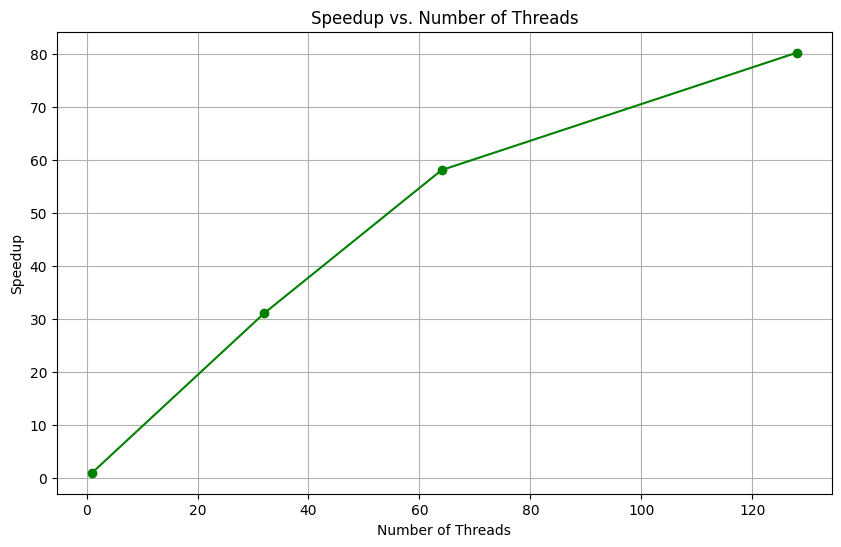

In [2]:
import matplotlib.pyplot as plt

# Calculate speedup for each thread count
speedup_32 = 16.650684 / 0.535955
speedup_64 = 16.650684 / 0.286636
speedup_128 = 16.650684 / 0.207543

# Data for plotting
thread_counts = [1, 32, 64, 128]
speedups = [1, speedup_32, speedup_64, speedup_128]

# Create the speedup plot
plt.figure(figsize=(10, 6))
plt.plot(thread_counts, speedups, marker='o', linestyle='-', color='g')

# Add titles and labels
plt.title('Speedup vs. Number of Threads')
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')

# Add grid for better readability
plt.grid(True)

# Display the plot
plt.show()

# Ex 4 Execution Time VS Scheduling Stuff 

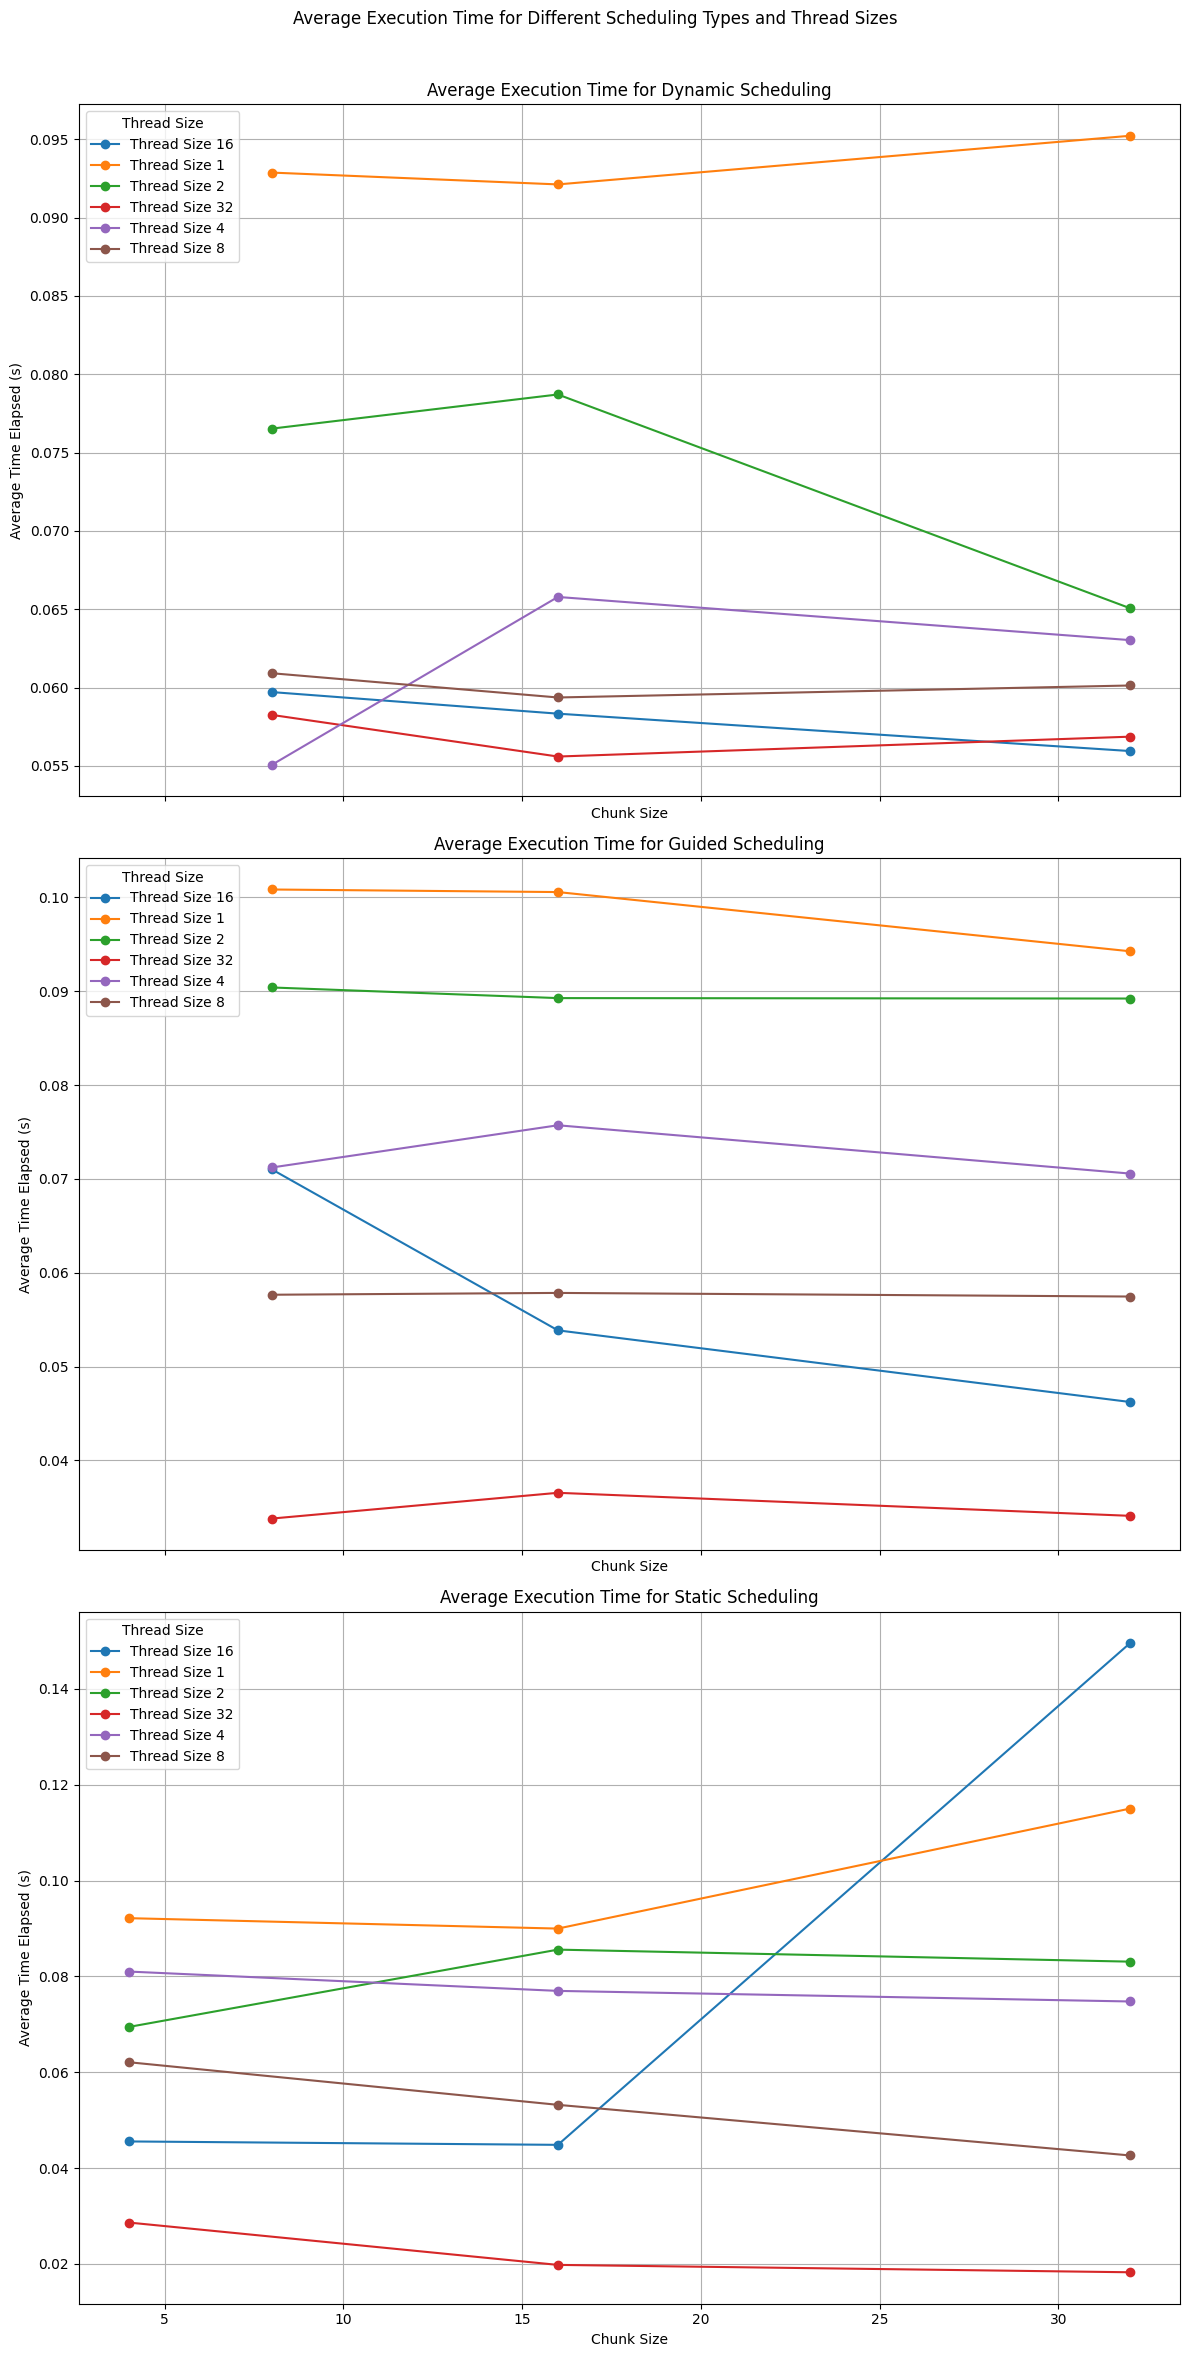

In [5]:
import os
import re
import glob
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Get the current working directory of the notebook
current_working_directory = os.getcwd()

# Construct the base directory using a relative path
# Assuming the notebook is in 'task2' and we need to go up one level to 'profiling'
base_directory = os.path.join(current_working_directory, 'batch_output', 'ex_5')

# Normalize the path to handle any relative path issues
base_directory = os.path.normpath(base_directory)

# Check if the base directory exists
if not os.path.exists(base_directory):
    raise FileNotFoundError(f"The directory {base_directory} does not exist.")

# Regular expression pattern to extract scheduling type, thread size, and chunk size from the filename
filename_pattern = r"performance_data_(\w+)_(\d+)_(\d+)\.txt$"

# Regular expression pattern to extract the execution time from the file content
time_elapsed_pattern = r"Execution time with scheduling: ([\d.]+) seconds"

# Dictionary to store execution times grouped by scheduling type, thread size, and chunk size
execution_times = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))
average_times = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

# List all files matching the pattern in the base directory
files = glob.glob(os.path.join(base_directory, "performance_data_*.txt"))

# Filter out directories, keep only files
files = [f for f in files if os.path.isfile(f)]

# Sort files in ascending order
files.sort()

# Loop through all files matching the pattern
for file_path in files:
    with open(file_path, 'r') as file:
        file_content = file.read()

        # Extract scheduling type, thread size, and chunk size from the filename
        filename_match = re.search(filename_pattern, os.path.basename(file_path))
        if filename_match:
            scheduling_type = filename_match.group(1)
            thread_size = int(filename_match.group(2))
            chunk_size = int(filename_match.group(3))

            # Extracting the time elapsed in seconds
            time_elapsed_match = re.search(time_elapsed_pattern, file_content)
            time_elapsed_seconds = time_elapsed_match.group(1) if time_elapsed_match else None

            # Store the execution times grouped by scheduling type, thread size, and chunk size
            if time_elapsed_seconds:
                execution_times[scheduling_type][thread_size][chunk_size].append(float(time_elapsed_seconds))

# Calculate the average execution time for each combination
for scheduling_type, thread_data in execution_times.items():
    for thread_size, chunk_data in thread_data.items():
        for chunk_size, times in chunk_data.items():
            average_times[scheduling_type][thread_size][chunk_size] = np.mean(times)

# Create subplots for each scheduling type
scheduling_types = ['dynamic', 'guided', 'static']
fig, axes = plt.subplots(nrows=len(scheduling_types), ncols=1, figsize=(12, 24), sharex=True)

for ax, scheduling_type in zip(axes, scheduling_types):
    # Plot data for each thread size
    for thread_size, chunk_data in average_times[scheduling_type].items():
        # Sort the average execution times by chunk size
        sorted_average = dict(sorted(chunk_data.items()))

        # Extract keys and values
        keys = list(sorted_average.keys())
        values = list(sorted_average.values())

        # Plot the data for the current thread size
        ax.plot(keys, values, marker='o', linestyle='-', label=f'Thread Size {thread_size}')

    ax.set_title(f'Average Execution Time for {scheduling_type.capitalize()} Scheduling')
    ax.set_xlabel('Chunk Size')
    ax.set_ylabel('Average Time Elapsed (s)')
    ax.legend(title='Thread Size')
    ax.grid(True)

# Add a common title
fig.suptitle('Average Execution Time for Different Scheduling Types and Thread Sizes')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Display the plot
plt.show()


# EX5 Visualisation 

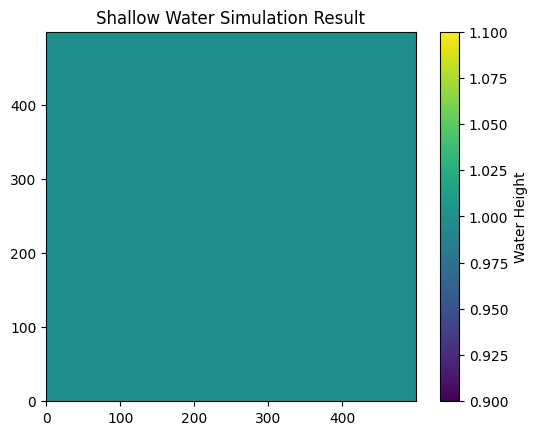

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Get the current working directory of the notebook
current_working_directory = os.getcwd()

# Construct the base directory using a relative path
# Assuming the notebook is in 'task2' and we need to go up one level to 'profiling'
base_directory = os.path.join(current_working_directory, 'batch_output', 'ex_5', 'output.txt')

# Normalize the path to handle any relative path issues
base_directory = os.path.normpath(base_directory)

data = np.loadtxt(base_directory)
plt.imshow(data, cmap='viridis', origin='lower')
plt.colorbar(label='Water Height')
plt.title('Shallow Water Simulation Result')
plt.show()

# ex5 speedup stuff with chunk stuff

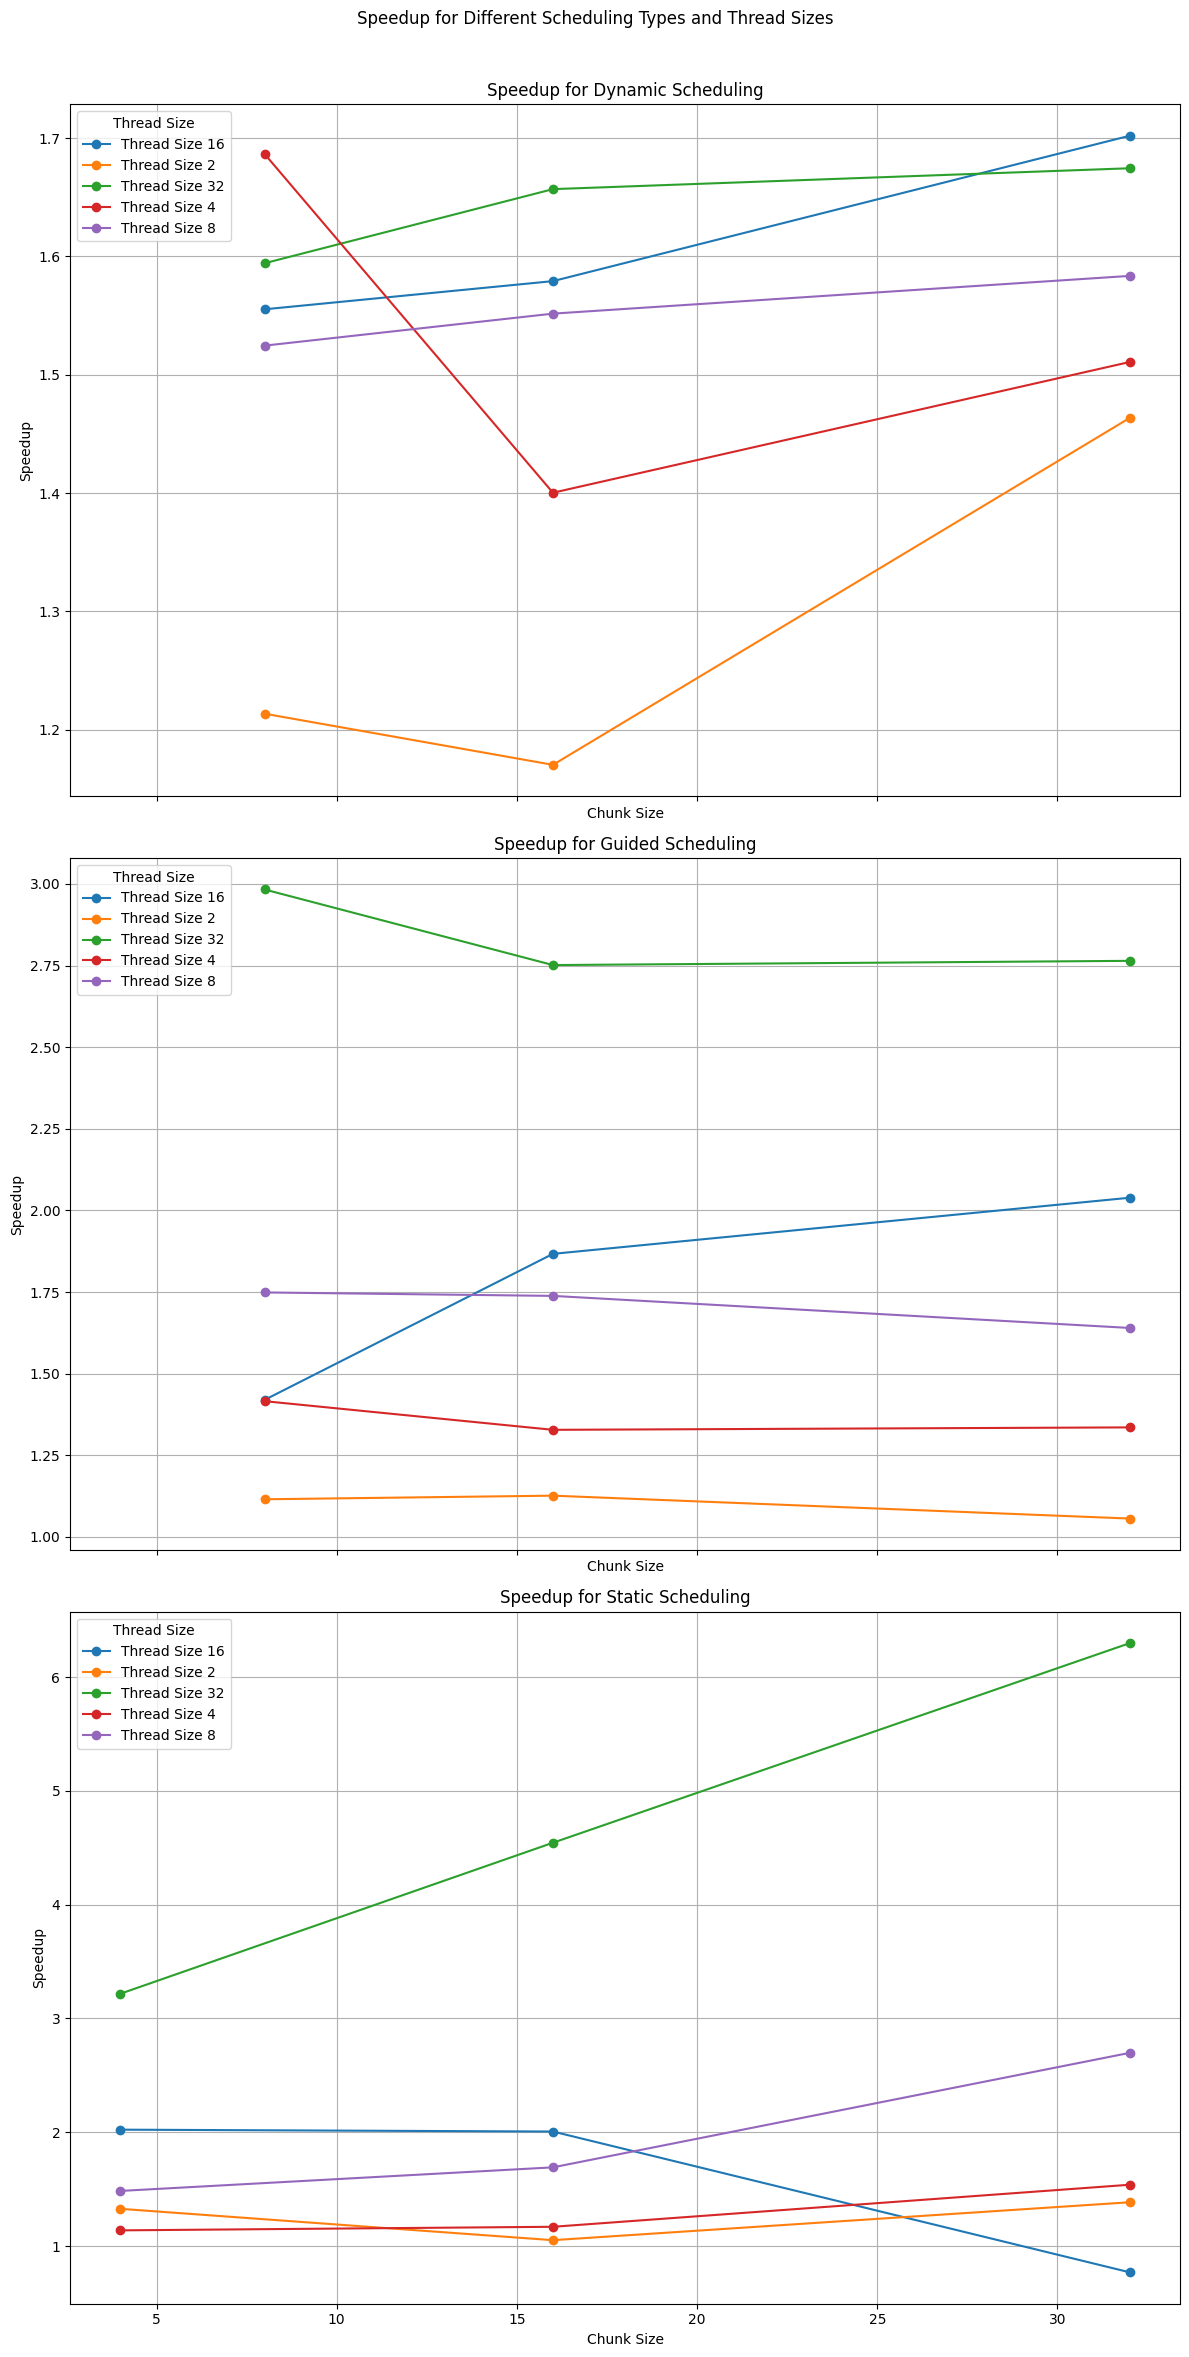

In [1]:
import os
import re
import glob
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Get the current working directory of the notebook
current_working_directory = os.getcwd()

# Construct the base directory using a relative path
base_directory = os.path.join(current_working_directory, 'batch_output', 'ex_5')

# Normalize the path to handle any relative path issues
base_directory = os.path.normpath(base_directory)

# Check if the base directory exists
if not os.path.exists(base_directory):
    raise FileNotFoundError(f"The directory {base_directory} does not exist.")

# Regular expression pattern to extract scheduling type, thread size, and chunk size from the filename
filename_pattern = r"performance_data_(\w+)_(\d+)_(\d+)\.txt$"

# Regular expression pattern to extract the execution time from the file content
time_elapsed_pattern = r"Execution time with scheduling: ([\d.]+) seconds"

# Dictionary to store execution times grouped by scheduling type, thread size, and chunk size
execution_times = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))
average_times = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

# List all files matching the pattern in the base directory
files = glob.glob(os.path.join(base_directory, "performance_data_*.txt"))

# Filter out directories, keep only files
files = [f for f in files if os.path.isfile(f)]

# Sort files in ascending order
files.sort()

# Loop through all files matching the pattern
for file_path in files:
    with open(file_path, 'r') as file:
        file_content = file.read()

        # Extract scheduling type, thread size, and chunk size from the filename
        filename_match = re.search(filename_pattern, os.path.basename(file_path))
        if filename_match:
            scheduling_type = filename_match.group(1)
            thread_size = int(filename_match.group(2))
            chunk_size = int(filename_match.group(3))

            # Extracting the time elapsed in seconds
            time_elapsed_match = re.search(time_elapsed_pattern, file_content)
            time_elapsed_seconds = time_elapsed_match.group(1) if time_elapsed_match else None

            # Store the execution times grouped by scheduling type, thread size, and chunk size
            if time_elapsed_seconds:
                execution_times[scheduling_type][thread_size][chunk_size].append(float(time_elapsed_seconds))

# Calculate the average execution time for each combination
for scheduling_type, thread_data in execution_times.items():
    for thread_size, chunk_data in thread_data.items():
        for chunk_size, times in chunk_data.items():
            average_times[scheduling_type][thread_size][chunk_size] = np.mean(times)

# Calculate speedup for each scheduling type, thread size, and chunk size
speedup = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

for scheduling_type, thread_data in average_times.items():
    for chunk_size, times in thread_data[1].items():  # Assuming thread_size 1 is the baseline
        single_thread_time = times
        for thread_size, chunk_times in thread_data.items():
            if thread_size != 1:
                speedup[scheduling_type][thread_size][chunk_size] = single_thread_time / chunk_times[chunk_size]

# Create subplots for each scheduling type
scheduling_types = ['dynamic', 'guided', 'static']
fig, axes = plt.subplots(nrows=len(scheduling_types), ncols=1, figsize=(12, 24), sharex=True)

for ax, scheduling_type in zip(axes, scheduling_types):
    # Plot data for each thread size
    for thread_size, chunk_data in speedup[scheduling_type].items():
        # Sort the speedup values by chunk size
        sorted_speedup = dict(sorted(chunk_data.items()))

        # Extract keys and values
        keys = list(sorted_speedup.keys())
        values = list(sorted_speedup.values())

        # Plot the data for the current thread size
        ax.plot(keys, values, marker='o', linestyle='-', label=f'Thread Size {thread_size}')

    ax.set_title(f'Speedup for {scheduling_type.capitalize()} Scheduling')
    ax.set_xlabel('Chunk Size')
    ax.set_ylabel('Speedup')
    ax.legend(title='Thread Size')
    ax.grid(True)

# Add a common title
fig.suptitle('Speedup for Different Scheduling Types and Thread Sizes')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Display the plot
plt.show()


# ex5 guided boyz

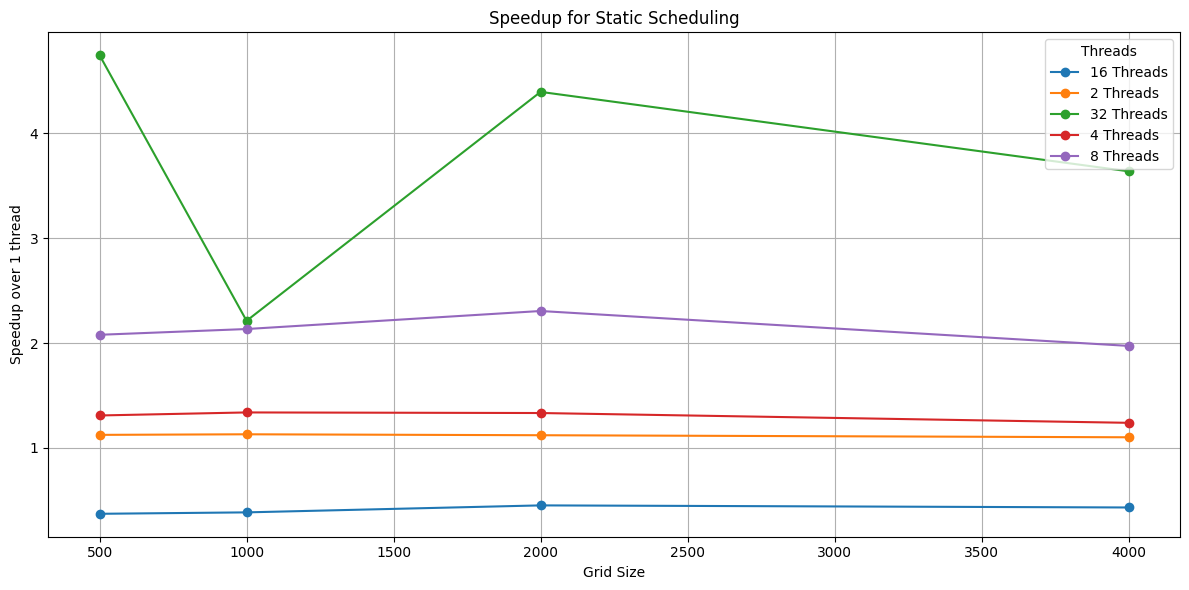

In [4]:
import os
import re
import glob
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# ——— static scheduling only ———
# Build and verify base directory
cwd = os.getcwd()
base_directory = os.path.normpath(os.path.join(cwd, 'batch_output', 'ex_5_guided'))
if not os.path.exists(base_directory):
    raise FileNotFoundError(f"The directory {base_directory} does not exist.")

# Patterns (fixed “static” in filename)
filename_pattern = r"performance_data_static_(\d+)_(\d+)\.txt$"
time_elapsed_pattern = r"Execution time with scheduling: ([\d.]+) seconds"

# execution_times[thread_size][chunk_size] -> list of runs
execution_times = defaultdict(lambda: defaultdict(list))

# Gather and parse files
files = sorted(glob.glob(os.path.join(base_directory, "performance_data_static_*.txt")))
for path in files:
    m = re.match(filename_pattern, os.path.basename(path))
    if not m:
        continue
    thread_size, chunk_size = map(int, m.groups())
    with open(path) as f:
        content = f.read()
    t = re.search(time_elapsed_pattern, content)
    if t:
        execution_times[thread_size][chunk_size].append(float(t.group(1)))

# Compute average times
average_times = {
    threads: {chunk: np.mean(times)
              for chunk, times in chunks.items()}
    for threads, chunks in execution_times.items()
}

# Baseline (1-thread)
if 1 not in average_times:
    raise ValueError("No data for thread_size=1 (baseline).")
baseline = average_times[1]

# Compute speedup for threads >1
speedup = {
    threads: {
        chunk: baseline[chunk] / avg_time
        for chunk, avg_time in chunks.items()
    }
    for threads, chunks in average_times.items()
    if threads != 1
}

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
for threads, chunk_data in speedup.items():
    grid_sizes, speedups = zip(*sorted(chunk_data.items()))
    ax.plot(grid_sizes, speedups, marker='o', linestyle='-',
            label=f'{threads} Threads')

ax.set_title("Speedup for Static Scheduling")
ax.set_xlabel("Grid Size")
ax.set_ylabel("Speedup over 1 thread")
ax.legend(title="Threads")
ax.grid(True)
plt.tight_layout()
plt.show()


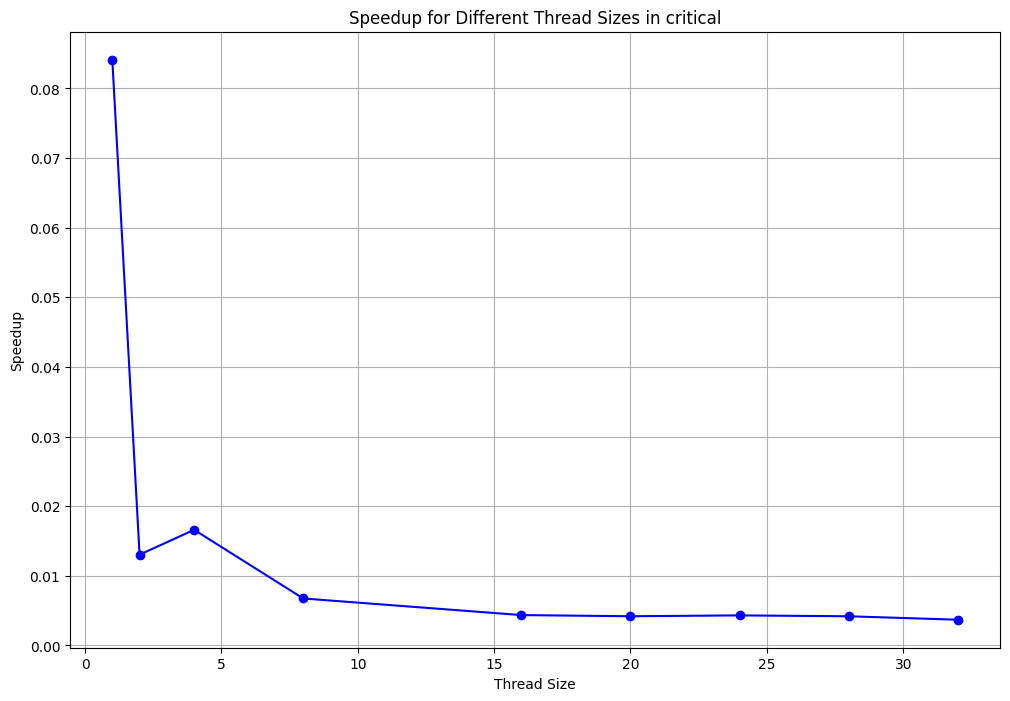

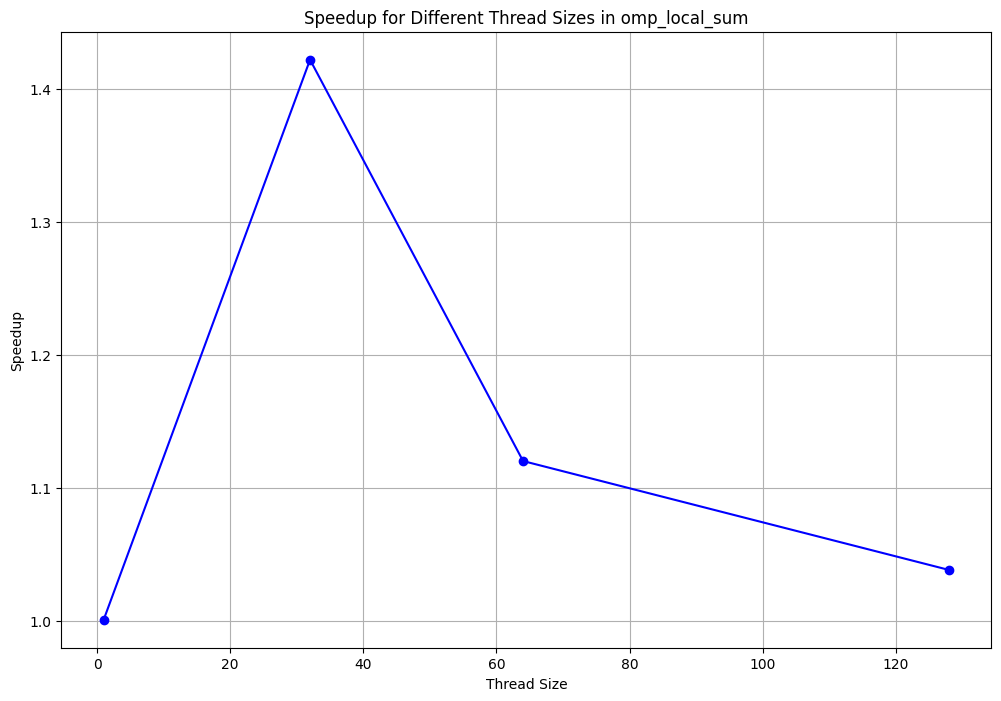

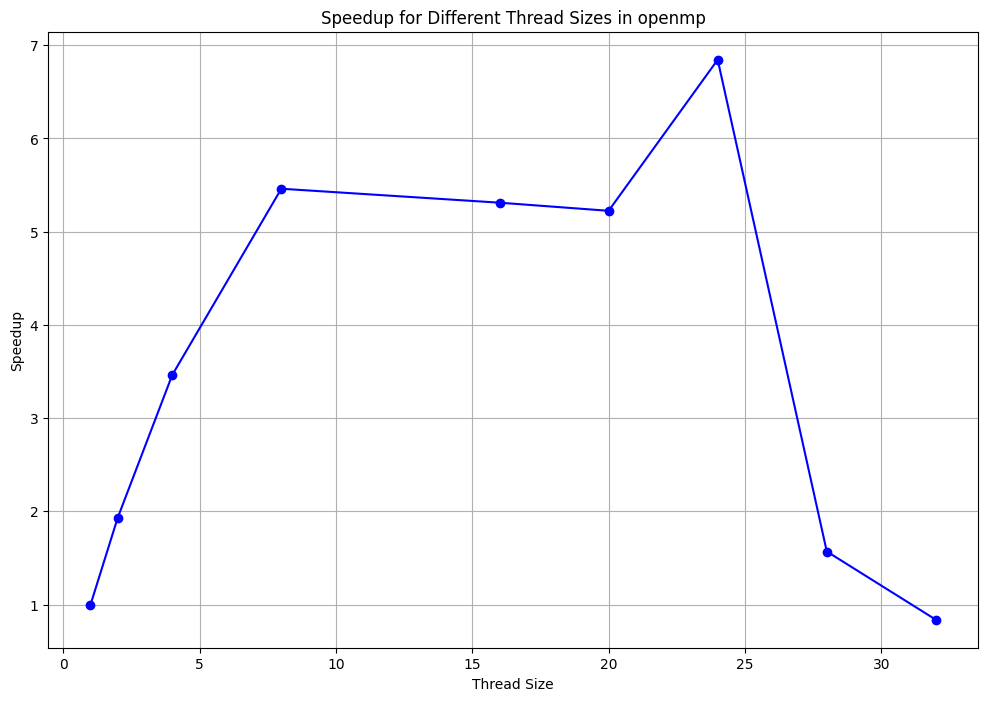

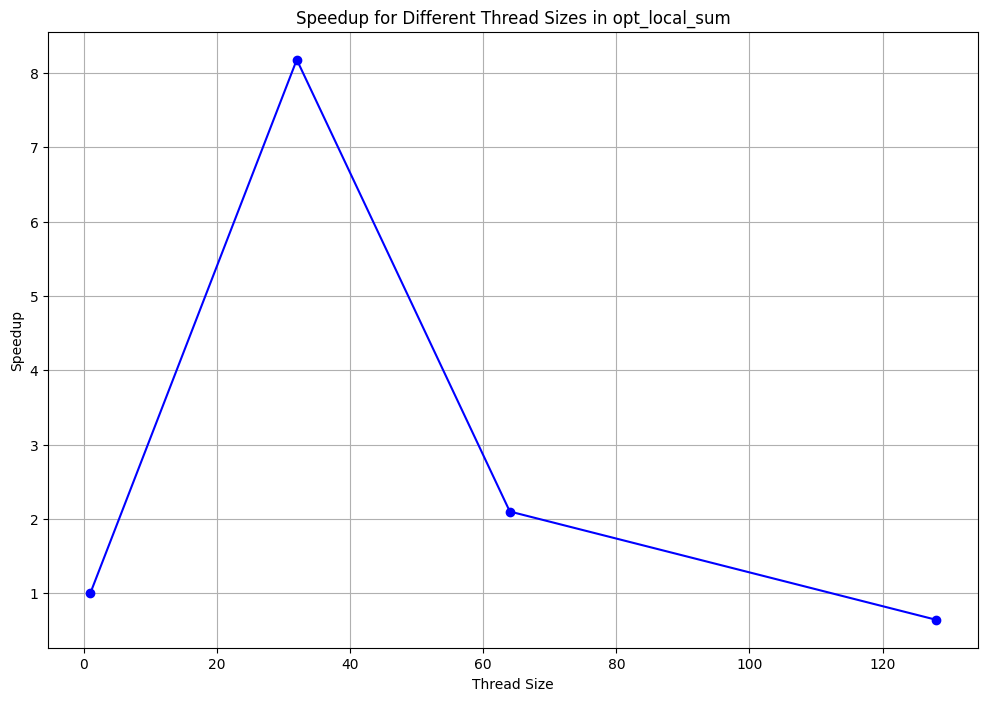

In [12]:
import os
import re
import glob
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Get the current working directory of the notebook
current_working_directory = os.getcwd()

# Construct the base directory using a relative path
base_directory = os.path.normpath(os.path.join(current_working_directory, 'batch_output', 'ex_3'))

# Check if the base directory exists
if not os.path.exists(base_directory):
    raise FileNotFoundError(f"The directory {base_directory} does not exist.")

# Regular expression pattern to extract thread size from the filename
# This pattern matches filenames like ex_3_openmp_critical_16_output.stdout
filename_pattern = r".*_(\d+)_output\.stdout$"

# Regular expression pattern to extract the execution time from the file content
time_elapsed_pattern = r"Execution time with scheduling: ([\d.]+) seconds"

# Function to get the baseline time from the serial output file
def get_baseline_time():
    serial_file_path = os.path.join(base_directory, 'serial', 'ex_3_serial_output.stdout')
    if not os.path.exists(serial_file_path):
        raise FileNotFoundError(f"The baseline file {serial_file_path} does not exist.")

    with open(serial_file_path, 'r') as file:
        file_content = file.read()
        time_elapsed_matches = re.findall(time_elapsed_pattern, file_content)
        if time_elapsed_matches:
            return np.mean(list(map(float, time_elapsed_matches)))
        else:
            raise ValueError("No execution time found in the baseline file.")

# Function to process files in a given directory
def process_directory(directory):
    # Dictionary to store execution times grouped by thread size
    execution_times = defaultdict(list)
    average_times = {}

    # List all files matching the pattern in the directory
    files = glob.glob(os.path.join(directory, "*.stdout"))

    # Filter out directories, keep only files
    files = [f for f in files if os.path.isfile(f)]

    # Sort files in ascending order
    files.sort()

    # Loop through all files matching the pattern
    for file_path in files:
        with open(file_path, 'r') as file:
            file_content = file.read()

            # Extract thread size from the filename
            filename_match = re.search(filename_pattern, os.path.basename(file_path))
            if filename_match:
                thread_size = int(filename_match.group(1))

                # Extracting all execution times in seconds
                time_elapsed_matches = re.findall(time_elapsed_pattern, file_content)

                # Store the execution times grouped by thread size
                if time_elapsed_matches:
                    execution_times[thread_size].extend(map(float, time_elapsed_matches))

    # Calculate the average execution time for each thread size
    for thread_size, times in execution_times.items():
        average_times[thread_size] = np.mean(times)

    return average_times

# Function to plot speedup for a given directory
def plot_speedup(directory, average_times, baseline_time):
    # Calculate speedup for each thread size
    speedup = {}

    for thread_size, avg_time in average_times.items():
        speedup[thread_size] = baseline_time / avg_time

    # Create a plot for speedup
    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot data for each thread size
    thread_sizes = sorted(speedup.keys())
    speedup_values = [speedup[thread_size] for thread_size in thread_sizes]

    ax.plot(thread_sizes, speedup_values, marker='o', linestyle='-', color='b')

    ax.set_title(f'Speedup for Different Thread Sizes in {os.path.basename(directory)}')
    ax.set_xlabel('Thread Size')
    ax.set_ylabel('Speedup')
    ax.grid(True)

    # Display the plot
    plt.show()

# Get the baseline time from the serial output file
baseline_time = get_baseline_time()

# Iterate over each subdirectory in the base directory
for subdir in os.listdir(base_directory):
    subdir_path = os.path.join(base_directory, subdir)
    if os.path.isdir(subdir_path) and subdir != 'serial':
        average_times = process_directory(subdir_path)
        plot_speedup(subdir_path, average_times, baseline_time)


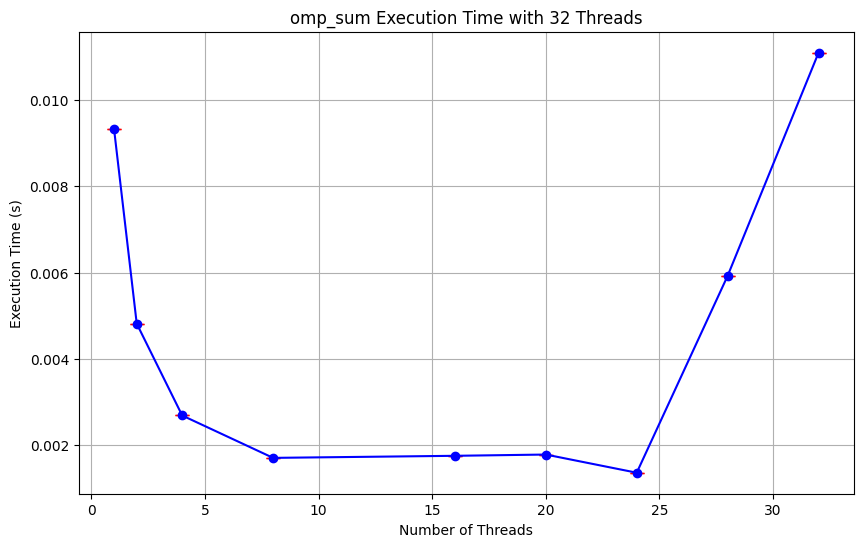

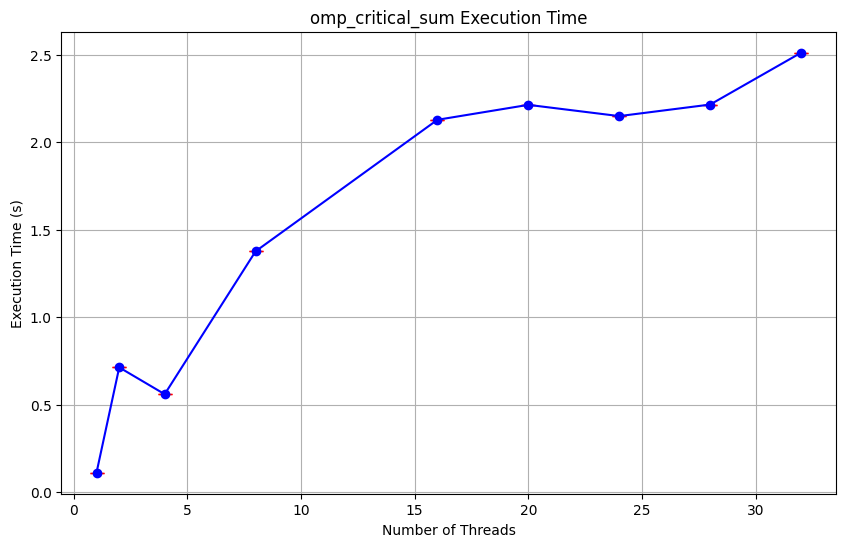

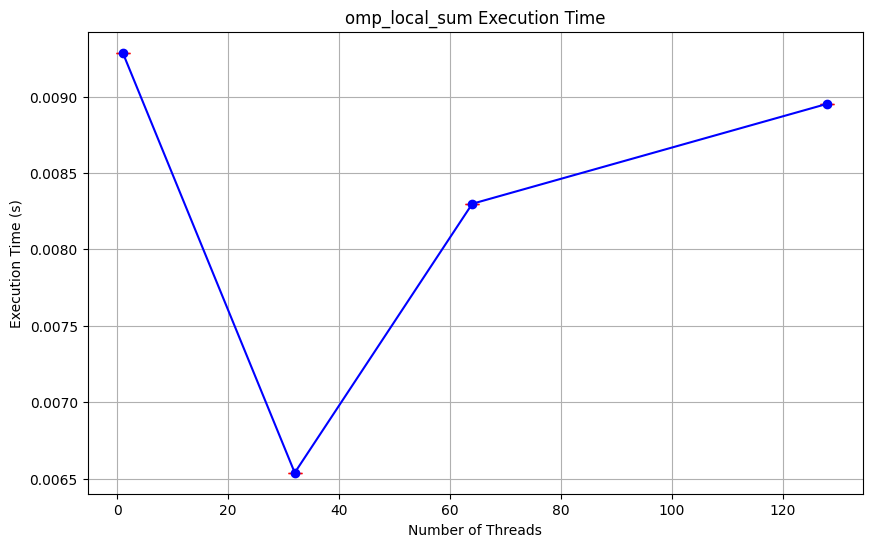

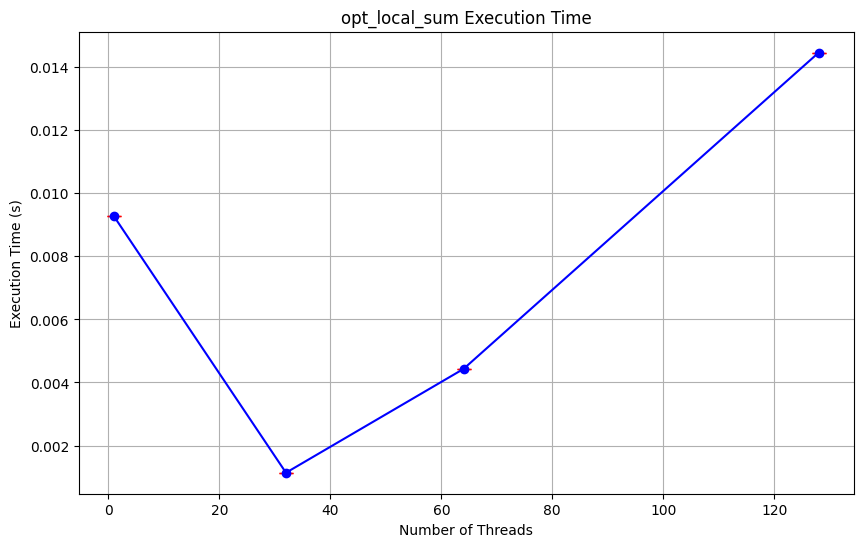

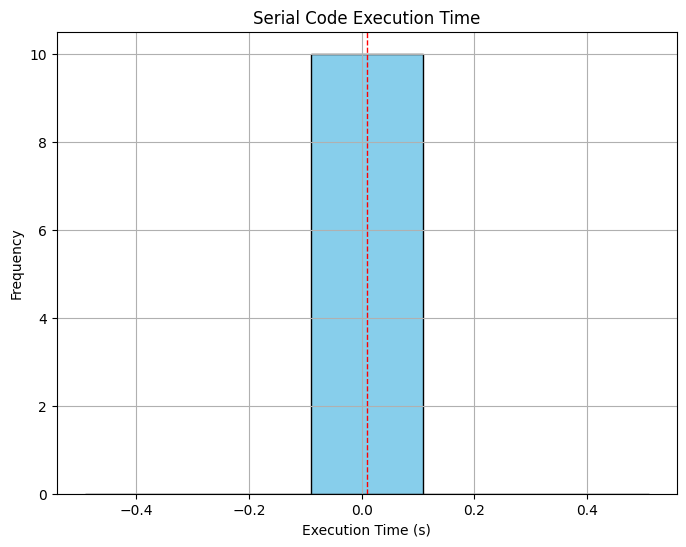

In [14]:
import os
import re
import glob
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Get the current working directory of the notebook
current_working_directory = os.getcwd()

# Construct the base directory using a relative path
base_directory = os.path.normpath(os.path.join(current_working_directory, 'batch_output', 'ex_3'))

# Check if the base directory exists
if not os.path.exists(base_directory):
    raise FileNotFoundError(f"The directory {base_directory} does not exist.")

# Regular expression pattern to extract thread size from the filename
filename_pattern = r".*_(\d+)_output\.stdout$"

# Regular expression pattern to extract the execution time from the file content
time_elapsed_pattern = r"Execution time with scheduling: ([\d.]+) seconds"

# Function to process files in a given directory
def process_directory(directory):
    # Dictionary to store execution times grouped by thread size
    execution_times = defaultdict(list)
    average_times = {}

    # List all files matching the pattern in the directory
    files = glob.glob(os.path.join(directory, "*.stdout"))

    # Filter out directories, keep only files
    files = [f for f in files if os.path.isfile(f)]

    # Sort files in ascending order
    files.sort()

    # Loop through all files matching the pattern
    for file_path in files:
        with open(file_path, 'r') as file:
            file_content = file.read()

            # Extract thread size from the filename
            filename_match = re.search(filename_pattern, os.path.basename(file_path))
            if filename_match:
                thread_size = int(filename_match.group(1))

                # Extracting all execution times in seconds
                time_elapsed_matches = re.findall(time_elapsed_pattern, file_content)

                # Store the execution times grouped by thread size
                if time_elapsed_matches:
                    execution_times[thread_size].extend(map(float, time_elapsed_matches))

    # Calculate the average execution time for each thread size
    for thread_size, times in execution_times.items():
        average_times[thread_size] = np.mean(times)

    return average_times

# Function to plot execution times with error bars
def plot_execution_times(times_dict, title, xlabel, ylabel):
    # Sort the dictionary by thread counts
    sorted_times_dict = dict(sorted(times_dict.items()))

    thread_counts = list(sorted_times_dict.keys())
    avg_times = [np.mean(times) for times in sorted_times_dict.values()]
    std_devs = [np.std(times) for times in sorted_times_dict.values()]

    plt.figure(figsize=(10, 6))
    plt.errorbar(thread_counts, avg_times, yerr=std_devs, marker='o', linestyle='-', color='b', ecolor='r', capsize=5)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()


# Function to get the baseline time from the serial output file
def get_baseline_time():
    serial_file_path = os.path.join(base_directory, 'serial', 'ex_3_serial_output.stdout')
    if not os.path.exists(serial_file_path):
        raise FileNotFoundError(f"The baseline file {serial_file_path} does not exist.")

    with open(serial_file_path, 'r') as file:
        file_content = file.read()
        time_elapsed_matches = re.findall(time_elapsed_pattern, file_content)
        if time_elapsed_matches:
            return np.mean(list(map(float, time_elapsed_matches)))
        else:
            raise ValueError("No execution time found in the baseline file.")

# Get the baseline time from the serial output file
baseline_time = get_baseline_time()

# Process each subdirectory and plot the results
subdirectories = ['openmp', 'critical', 'omp_local_sum', 'opt_local_sum']
titles = {
    'openmp': 'omp_sum Execution Time with 32 Threads',
    'critical': 'omp_critical_sum Execution Time',
    'omp_local_sum': 'omp_local_sum Execution Time',
    'opt_local_sum': 'opt_local_sum Execution Time'
}

for subdir in subdirectories:
    subdir_path = os.path.join(base_directory, subdir)
    if os.path.isdir(subdir_path):
        average_times = process_directory(subdir_path)
        plot_execution_times(average_times, titles[subdir], 'Number of Threads', 'Execution Time (s)')

# Plot Serial Code Performance
serial_times = [baseline_time] * 10  # Assuming 10 runs for consistency
plt.figure(figsize=(8, 6))
plt.hist(serial_times, bins=5, color='skyblue', edgecolor='black')
plt.axvline(np.mean(serial_times), color='red', linestyle='dashed', linewidth=1)
plt.title('Serial Code Execution Time')
plt.xlabel('Execution Time (s)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


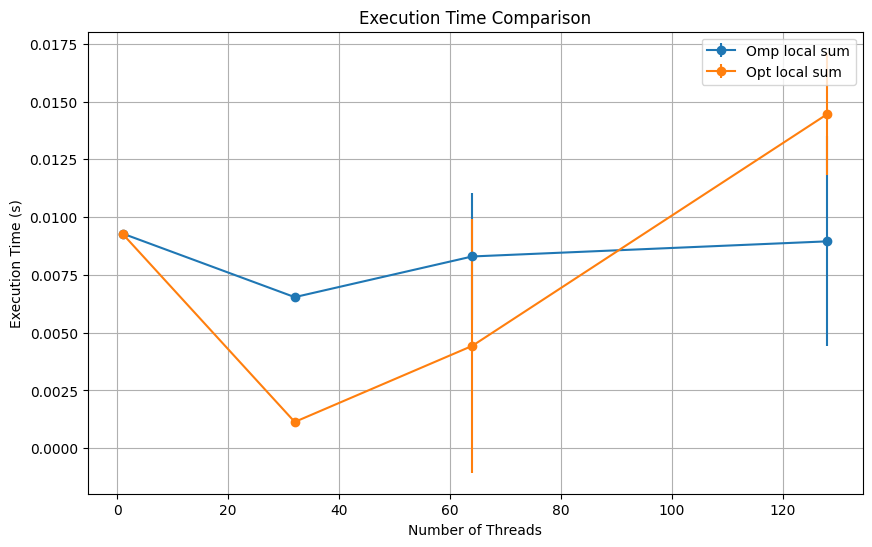

In [22]:
import os
import re
import glob
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Get the current working directory of the notebook
current_working_directory = os.getcwd()

# Construct the base directory using a relative path
base_directory = os.path.normpath(os.path.join(current_working_directory, 'batch_output', 'ex_3'))

# Check if the base directory exists
if not os.path.exists(base_directory):
    raise FileNotFoundError(f"The directory {base_directory} does not exist.")

# Regular expression pattern to extract thread size from the filename
filename_pattern = r".*_(\d+)_output\.stdout$"

# Regular expression pattern to extract the execution time from the file content
time_elapsed_pattern = r"Execution time with scheduling: ([\d.]+) seconds"

# Function to process files in a given directory
def process_directory(directory):
    # Dictionary to store execution times grouped by thread size
    execution_times = defaultdict(list)

    # List all files matching the pattern in the directory
    files = glob.glob(os.path.join(directory, "*.stdout"))

    # Filter out directories, keep only files
    files = [f for f in files if os.path.isfile(f)]

    # Sort files in ascending order
    files.sort()

    # Loop through all files matching the pattern
    for file_path in files:
        with open(file_path, 'r') as file:
            file_content = file.read()

            # Extract thread size from the filename
            filename_match = re.search(filename_pattern, os.path.basename(file_path))
            if filename_match:
                thread_size = int(filename_match.group(1))

                # Extracting all execution times in seconds
                time_elapsed_matches = re.findall(time_elapsed_pattern, file_content)

                # Store the execution times grouped by thread size
                if time_elapsed_matches:
                    execution_times[thread_size].extend(map(float, time_elapsed_matches))

    return execution_times

# Function to get the baseline time from the serial output file
def get_baseline_time():
    serial_file_path = os.path.join(base_directory, 'serial', 'ex_3_serial_output.stdout')
    if not os.path.exists(serial_file_path):
        raise FileNotFoundError(f"The baseline file {serial_file_path} does not exist.")

    with open(serial_file_path, 'r') as file:
        file_content = file.read()
        time_elapsed_matches = re.findall(time_elapsed_pattern, file_content)
        if time_elapsed_matches:
            return np.mean(list(map(float, time_elapsed_matches)))
        else:
            raise ValueError("No execution time found in the baseline file.")

# Get the baseline time from the serial output file
baseline_time = get_baseline_time()

# Process each subdirectory
subdirectories = ['omp_local_sum', 'opt_local_sum']

# Process and plot data for each subdirectory
fig, ax = plt.subplots(figsize=(10, 6))

for subdir in subdirectories:
    subdir_path = os.path.join(base_directory, subdir)
    if os.path.isdir(subdir_path):
        execution_times = process_directory(subdir_path)

        # Sort the dictionary by thread counts
        sorted_times_dict = dict(sorted(execution_times.items()))

        thread_counts = list(sorted_times_dict.keys())
        avg_times = [np.mean(times) for times in sorted_times_dict.values()]
        std_devs = [np.std(times) for times in sorted_times_dict.values()]

        # Plot with error bars
        ax.errorbar(thread_counts, avg_times, yerr=std_devs, marker='o', linestyle='-', label=subdir.replace('_', ' ').capitalize())

# Add labels and legend
ax.set_title('Execution Time Comparison')
ax.set_xlabel('Number of Threads')
ax.set_ylabel('Execution Time (s)')
ax.legend(loc='upper right')
ax.grid(True)

# Show plot
plt.show()


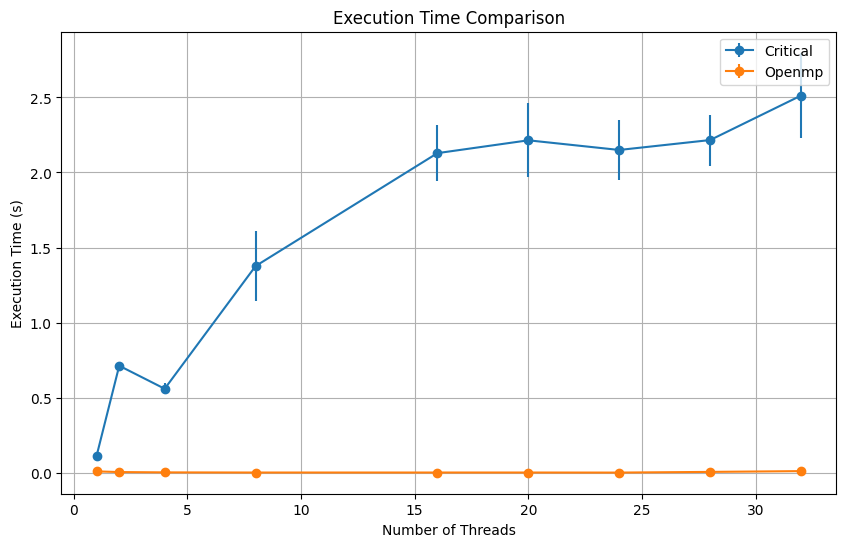

In [23]:
import os
import re
import glob
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Get the current working directory of the notebook
current_working_directory = os.getcwd()

# Construct the base directory using a relative path
base_directory = os.path.normpath(os.path.join(current_working_directory, 'batch_output', 'ex_3'))

# Check if the base directory exists
if not os.path.exists(base_directory):
    raise FileNotFoundError(f"The directory {base_directory} does not exist.")

# Regular expression pattern to extract thread size from the filename
filename_pattern = r".*_(\d+)_output\.stdout$"

# Regular expression pattern to extract the execution time from the file content
time_elapsed_pattern = r"Execution time with scheduling: ([\d.]+) seconds"

# Function to process files in a given directory
def process_directory(directory):
    # Dictionary to store execution times grouped by thread size
    execution_times = defaultdict(list)

    # List all files matching the pattern in the directory
    files = glob.glob(os.path.join(directory, "*.stdout"))

    # Filter out directories, keep only files
    files = [f for f in files if os.path.isfile(f)]

    # Sort files in ascending order
    files.sort()

    # Loop through all files matching the pattern
    for file_path in files:
        with open(file_path, 'r') as file:
            file_content = file.read()

            # Extract thread size from the filename
            filename_match = re.search(filename_pattern, os.path.basename(file_path))
            if filename_match:
                thread_size = int(filename_match.group(1))

                # Extracting all execution times in seconds
                time_elapsed_matches = re.findall(time_elapsed_pattern, file_content)

                # Store the execution times grouped by thread size
                if time_elapsed_matches:
                    execution_times[thread_size].extend(map(float, time_elapsed_matches))

    return execution_times

# Function to get the baseline time from the serial output file
def get_baseline_time():
    serial_file_path = os.path.join(base_directory, 'serial', 'ex_3_serial_output.stdout')
    if not os.path.exists(serial_file_path):
        raise FileNotFoundError(f"The baseline file {serial_file_path} does not exist.")

    with open(serial_file_path, 'r') as file:
        file_content = file.read()
        time_elapsed_matches = re.findall(time_elapsed_pattern, file_content)
        if time_elapsed_matches:
            return np.mean(list(map(float, time_elapsed_matches)))
        else:
            raise ValueError("No execution time found in the baseline file.")

# Get the baseline time from the serial output file
baseline_time = get_baseline_time()

# Process each subdirectory
subdirectories = ['critical', 'openmp']

# Process and plot data for each subdirectory
fig, ax = plt.subplots(figsize=(10, 6))

for subdir in subdirectories:
    subdir_path = os.path.join(base_directory, subdir)
    if os.path.isdir(subdir_path):
        execution_times = process_directory(subdir_path)

        # Sort the dictionary by thread counts
        sorted_times_dict = dict(sorted(execution_times.items()))

        thread_counts = list(sorted_times_dict.keys())
        avg_times = [np.mean(times) for times in sorted_times_dict.values()]
        std_devs = [np.std(times) for times in sorted_times_dict.values()]

        # Plot with error bars
        ax.errorbar(thread_counts, avg_times, yerr=std_devs, marker='o', linestyle='-', label=subdir.replace('_', ' ').capitalize())

# Add labels and legend
ax.set_title('Execution Time Comparison')
ax.set_xlabel('Number of Threads')
ax.set_ylabel('Execution Time (s)')
ax.legend(loc='upper right')
ax.grid(True)

# Show plot
plt.show()
